In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  

%matplotlib inline

In [24]:
df = pd.read_csv("./data_1024.csv.txt", sep="\t")

In [26]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


## From scratch

In [3]:
def calcDistance(df, indexValues, features, _class):
    distances = np.zeros((len(df), ))
    for feature in features:
        distances = distances + ((df[feature] - indexValues[feature]) ** 2)
    distances = np.sqrt(distances)
    return pd.DataFrame({_class: distances.values})

In [4]:
features = [ 'Distance_Feature', 'Speeding_Feature']
calcDistance(df, df.loc[10], features, 'A').head()

,A
0,24.963415
1,15.333375
2,19.993401
3,19.083909
4,15.885619


In [6]:
def getClasses(df, features, centroids):
    df_total = pd.DataFrame({'temp': range(len(df))})
    for centroid in centroids:
        df_total = df_total.join(calcDistance(df, centroids[centroid], features, centroid))
    df_total = df_total.drop('temp', axis=1)
    return df_total

In [7]:
centroids = {
    'A': df.loc[1][features],
    'B': df.loc[2][features]
}

getClasses(df, features, centroids).head()

,A,B
0,18.948987,6.774216
1,0.000000,12.175389
2,12.175389,0.000000
3,4.357247,10.164768
4,2.050000,10.158819


In [8]:
def getInitCentroids(df, features, centroids):
    initChar = 'A'
    centroidDict = {}
    for centroid in centroids:
        centroidDict[initChar] = df.loc[centroid][features]
        initChar = chr(ord(initChar) + 1)
    return centroidDict

In [9]:
getInitCentroids(df, features, [2, 3, 4])

{'A': Distance_Feature    64.54
 Speeding_Feature    27.00
 Name: 2, dtype: float64, 'B': Distance_Feature    55.69
 Speeding_Feature    22.00
 Name: 3, dtype: float64, 'C': Distance_Feature    54.58
 Speeding_Feature    25.00
 Name: 4, dtype: float64}

In [10]:
def k_means(df, features, centroidList, iterations=20):
    centroids = getInitCentroids(df, features, centroidList)
    for i in range(iterations):
        minClasses = pd.DataFrame(getClasses(df, features, centroids).idxmin(axis=1))
        minClassName = 'min_dist_class_' + str(i)
        minClasses = minClasses.rename(columns={0: minClassName})
        df = df.join(minClasses)
        for centroid in centroids:
            centroids[centroid] = df.loc[df[minClassName] == centroid][features].mean()
    return df, centroids

In [32]:
df_means, centroids = k_means(df, features, [6, 7], 10)

In [33]:
centroids

{'A': Distance_Feature    180.017075
 Speeding_Feature     18.290000
 dtype: float64, 'B': Distance_Feature    50.047634
 Speeding_Feature     8.828750
 dtype: float64}

In [21]:
df_labels = df_means.iloc[:, -1].astype('category')

In [22]:
df_label_values = df_labels.cat.codes.values

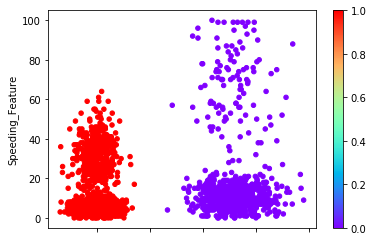

In [23]:
df.plot.scatter(x=features[0], y=features[1], c=df_label_values, cmap='rainbow')

## Using scikit learn

In [30]:
kmeans = KMeans(n_clusters=2)
X =
kmeans.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
print(kmeans.cluster_centers_)

[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [ ]:
t.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')